### Exercise 1: Contingent Comparisons
- Load the Minnesota use of force data.
- Bootstrap the proportion of missing values for `subject_injury` for each race, and plot the results with grouped KDE and ECDF plots
- Describe what you see. When we consider second order uncertainty, how similar or different are the sampling distributions of these proportions? 

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
Minnesota = pd.read_csv('./data/mn_police_use_of_force.csv')
Minnesota

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12920,2021/08/30 21:38:46,Assault in Progress,Yes,ASLT5,NaN,Bodily Force,Joint Lock,White,Female,69.0,NaN,1,Loring Park
12921,2021/08/30 22:32:22,Unwanted Person,Yes,CIC,NaN,Bodily Force,Joint Lock,NaN,NaN,NaN,NaN,1,Cedar Riverside
12922,2021/08/31 12:03:08,Overdose w/All,Yes,FORCE,NaN,Bodily Force,Body Weight Pin,Black,Male,NaN,NaN,3,Seward
12923,2021/08/31 12:52:52,Attempt Pick-Up,No,WT,NaN,Bodily Force,Body Weight Pin,Black,Male,31.0,NaN,4,Camden Industrial


In [165]:
# Drop rows where 'race' is missing, as the analysis is contingent on race
df_clean = df.dropna(subset=['race']).copy()

# Define the function to calculate the statistic (proportion of missing subject_injury by race)
def calculate_missing_prop(data):
    """Calculates the proportion of missing 'subject_injury' for each race in the data."""
    # .isnull().sum() is the count of NA values for 'subject_injury' in each race group
    missing_count = data.groupby('race')['subject_injury'].apply(lambda x: x.isnull().sum())
    
    # .size() is the total number of records (rows) for each race group
    total_count = data.groupby('race')['subject_injury'].size()
    
    # Calculate the proportion
    proportion = missing_count / total_count
    return proportion

# Set parameters for bootstrapping
np.random.seed(42) # for reproducibility
n_iterations = 1000

# Initialize a structure to store bootstrap results
races = df_clean['race'].unique()
bootstrap_results = {race: [] for race in races}

# Perform the bootstrapping
for i in range(n_iterations):
    # 1. Resample with replacement (Bootstrap sample)
    sample = df_clean.sample(n=len(df_clean), replace=True)
    
    # 2. Calculate the statistic on the sample
    sample_props = calculate_missing_prop(sample)
    
    # 3. Store the results
    for race in races:
        # Check if the race exists in the sample (to handle rare races that might be missed)
        if race in sample_props:
            bootstrap_results[race].append(sample_props[race])

# Organize results into a long-format DataFrame for plotting and analysis
bootstrap_df = pd.DataFrame(
    [(race, prop) for race, props in bootstrap_results.items() for prop in props], 
    columns=['race', 'missing_prop']
)

# Save the bootstrap results to a CSV file (used for the plotting step)
bootstrap_df.to_csv("bootstrap_missing_prop.csv", index=False)

# Print descriptive statistics of the resulting sampling distributions
print("Descriptive Statistics of Bootstrap Proportions:")
print(bootstrap_df.groupby('race')['missing_prop'].describe())

Descriptive Statistics of Bootstrap Proportions:
                     count      mean       std       min       25%       50%  \
race                                                                           
Asian               1000.0  0.635017  0.042995  0.491071  0.604651  0.634921   
Black               1000.0  0.759471  0.004690  0.744692  0.756174  0.759270   
Native American     1000.0  0.719788  0.016252  0.667920  0.709429  0.720493   
Other / Mixed Race  1000.0  0.410433  0.034082  0.311111  0.386649  0.410317   
Pacific Islander     998.0  1.000000  0.000000  1.000000  1.000000  1.000000   
White               1000.0  0.753811  0.007740  0.724868  0.748845  0.753576   

                         75%       max  
race                                    
Asian               0.664000  0.766129  
Black               0.762644  0.773368  
Native American     0.730359  0.769433  
Other / Mixed Race  0.433333  0.511111  
Pacific Islander    1.000000  1.000000  
White               0.7

<>:24: SyntaxWarning: invalid escape sequence '\_'
<>:25: SyntaxWarning: invalid escape sequence '\_'
<>:36: SyntaxWarning: invalid escape sequence '\_'
<>:37: SyntaxWarning: invalid escape sequence '\_'
<>:24: SyntaxWarning: invalid escape sequence '\_'
<>:25: SyntaxWarning: invalid escape sequence '\_'
<>:36: SyntaxWarning: invalid escape sequence '\_'
<>:37: SyntaxWarning: invalid escape sequence '\_'
/var/folders/n2/lt2mc7z901q9k1mx_2s6ypb00000gn/T/ipykernel_5811/2970902201.py:24: SyntaxWarning: invalid escape sequence '\_'
  axes[0].set_title('KDE of Missing subject\_injury Proportion by Race')
/var/folders/n2/lt2mc7z901q9k1mx_2s6ypb00000gn/T/ipykernel_5811/2970902201.py:25: SyntaxWarning: invalid escape sequence '\_'
  axes[0].set_xlabel('Proportion of Missing subject\_injury Values')
/var/folders/n2/lt2mc7z901q9k1mx_2s6ypb00000gn/T/ipykernel_5811/2970902201.py:36: SyntaxWarning: invalid escape sequence '\_'
  axes[1].set_title('ECDF of Missing subject\_injury Proportion by Race'

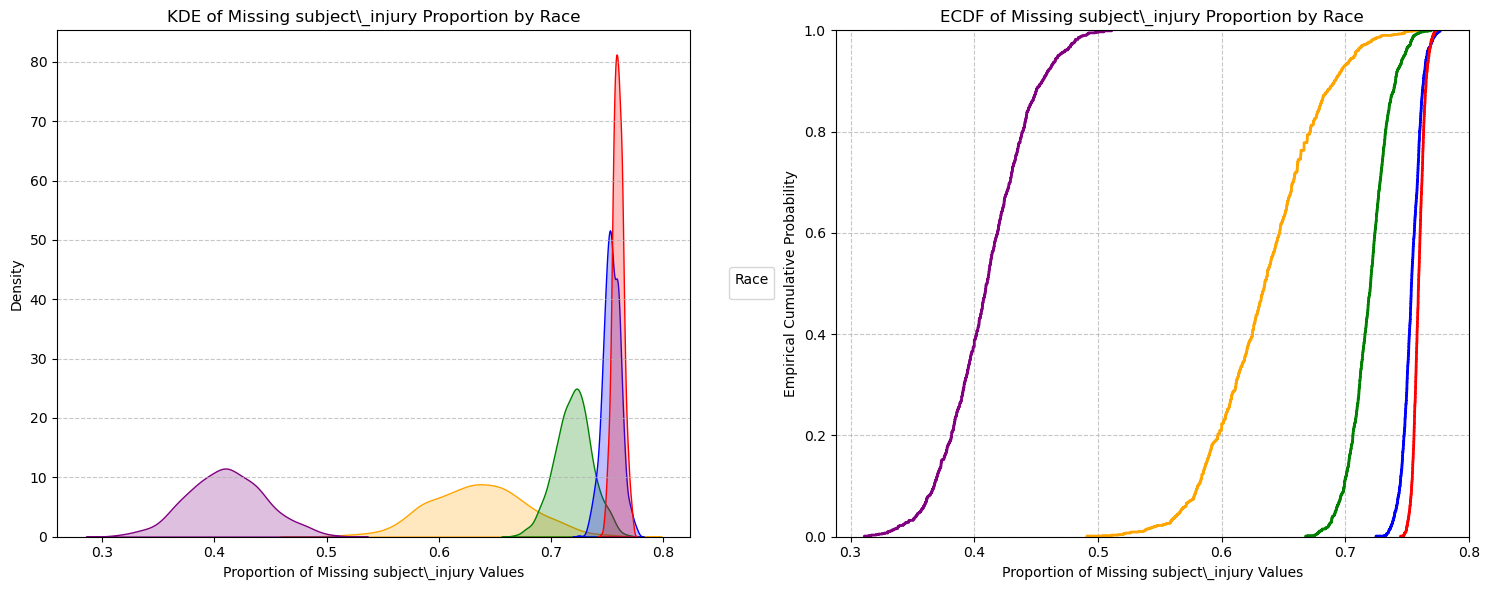

In [169]:
# Load the bootstrap results generated in the previous step
bootstrap_df = pd.read_csv("bootstrap_missing_prop.csv")

# Filter out 'Pacific Islander' for clearer visualization of the other groups
# (its proportion of 1.0 with 0 variance would skew the plot scale)
plot_df = bootstrap_df[bootstrap_df['race'] != 'Pacific Islander'].copy()

race_colors = {
    'Black': 'red',           # Example: Highlight the largest group in Red
    'White': 'blue',          # Example: Use Blue for the second largest
    'Native American': 'green',
    'Asian': 'orange',
    'Other / Mixed Race': 'purple'
}

# Set up the figure for two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- KDE Plot ---
# Kernel Density Estimate plot shows the sampling distribution for each race
sns.kdeplot(data=plot_df, x='missing_prop', hue='race', 
            fill=True, common_norm=False, ax=axes[0], palette=race_colors)

axes[0].set_title('KDE of Missing subject\_injury Proportion by Race')
axes[0].set_xlabel('Proportion of Missing subject\_injury Values')
axes[0].set_ylabel('Density')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
# Move legend to outside for better visibility
axes[0].legend(title='Race', loc='center left', bbox_to_anchor=(1.05, 0.5))

# --- ECDF Plot ---
# Empirical Cumulative Distribution Function plot helps compare quantiles
sns.ecdfplot(data=plot_df, x='missing_prop', hue='race', ax=axes[1], 
             palette=race_colors, linewidth=2)
             
axes[1].set_title('ECDF of Missing subject\_injury Proportion by Race')
axes[1].set_xlabel('Proportion of Missing subject\_injury Values')
axes[1].set_ylabel('Empirical Cumulative Probability')
axes[1].grid(axis='both', linestyle='--', alpha=0.7)

# Remove the redundant legend from the ECDF plot
if axes[1].get_legend():
    axes[1].get_legend().remove()

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 1, 1])

plt.show() # Note: This line is commented out as it's not needed in this environment

## Analysis

- The sampling distributions for `Black` and `White` have the lowest uncertainty. They are very similar (steepest ECDF). 

- The sampling distributions for `Asian` and  `Other/ Mixed Race` have the highest uncertainty. They are very different (shallowest ECDF).